# Concatenar y apendizar data sets

# Joins de datasets

In [1]:
pip install pandas

     |████████████████████████████████| 10.4MB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 20.1MB 20.1MB/s eta 0:00:01     |██████████████████████████████▋ | 19.3MB 20.1MB/s eta 0:00:01
     |████████████████████████████████| 512kB 39.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install xlrd

     |████████████████████████████████| 112kB 3.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [60]:
atletas_info = pd.read_excel("atletas_info.xlsx")

In [61]:
atletas_info.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Aleksey Nemov,24,2000,10/01/2000,2,1,3,6
1,Alicia Coutts,24,2012,08/12/2012,1,3,1,5
2,Missy Franklin,17,2012,08/12/2012,4,0,1,5
3,Nastia Liukin,18,2008,08/24/2008,1,3,1,5
4,Sun Yang,20,2012,08/12/2012,2,1,1,4


In [62]:
atletas_info.shape

(5579, 8)

In [63]:
atletas_pais = pd.read_excel("atletas_country.xlsx")

In [64]:
atletas_pais.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [65]:
atletas_pais.shape

(6942, 2)

## Tipos de Joins

In [66]:
from IPython.display import Image
import numpy as np

**Inner Join <= A (Left Join), B (Right Join) <= Outer Join**

## Inner Join
* Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
* El número de filas será igual al número de filas **comunes** que tengas ambos data sets
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Inner Join B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

In [67]:
Image(filename="resources/inner-join.png")

FileNotFoundError: [Errno 2] No such file or directory: 'resources/inner-join.png'

In [68]:
atletas_inner = pd.merge(left = atletas_info, right = atletas_pais,
                       how = "inner", left_on = "Athlete", right_on = "Athlete")

In [69]:
atletas_inner.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Aleksey Nemov,24,2000,10/01/2000,2,1,3,6,Russia
1,Alicia Coutts,24,2012,08/12/2012,1,3,1,5,Australia
2,Missy Franklin,17,2012,08/12/2012,4,0,1,5,United States
3,Nastia Liukin,18,2008,08/24/2008,1,3,1,5,United States
4,Sun Yang,20,2012,08/12/2012,2,1,1,4,China


In [94]:
atletas_inner.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
5572,Olena Sadovnycha,32,2000,10/01/2000,0,1,0,1,Ukraine
5573,Kateryna Serdiuk,17,2000,10/01/2000,0,1,0,1,Ukraine
5574,Wietse van Alten,21,2000,10/01/2000,0,0,1,1,Netherlands
5575,Sandra Wagner-Sachse,31,2000,10/01/2000,0,0,1,1,Germany
5576,Rod White,23,2000,10/01/2000,0,0,1,1,United States


In [70]:
atletas_inner.shape

(5577, 9)

## Left Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendrán NAs en las columnas del data frame derecho.
* El número de filas será igual al número de filas del data frame izquierdo
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Left Join B tendrá 60 filas
* En términos de teoría de conjuntos, se trata del propio data set de la izquierda quien, además tiene la intersección en su interior.

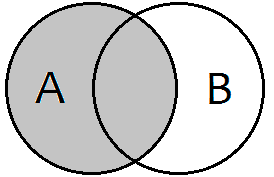

In [81]:
Image(filename="resources/left-join.png")

In [71]:
atletas_left = pd.merge(left = atletas_info, right = atletas_pais,
                       how = "left", left_on = "Athlete", right_on = "Athlete")

In [83]:
atletas_left.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Aleksey Nemov,24,2000,10/01/2000,2,1,3,6,Russia
1,Alicia Coutts,24,2012,08/12/2012,1,3,1,5,Australia
2,Missy Franklin,17,2012,08/12/2012,4,0,1,5,United States
3,Nastia Liukin,18,2008,08/24/2008,1,3,1,5,United States
4,Sun Yang,20,2012,08/12/2012,2,1,1,4,China


In [82]:
atletas_left[atletas_left["Country"].isnull()]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
5577,Juan Luis Corredor,19,2010,10/01/2001,0,0,1,3,NaN
5578,Pedro,19,2010,10/01/2002,0,0,1,1,NaN


In [74]:
atletas_left.shape

(5579, 9)

## Right Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame izquierdo, tendrán NAs en las columnas del data frame izquierdo.
* El número de filas será igual al número de filas del data frame derecho
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Right Join B tendrá 50 filas
* En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior.

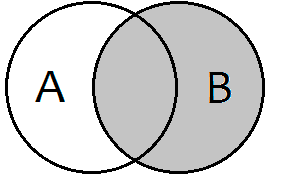

In [82]:
Image(filename="resources/right-join.png")

In [87]:
atletas_right = pd.merge(left = atletas_info, right = atletas_pais,
                       how = "right", left_on = "Athlete", right_on = "Athlete")

In [88]:
atletas_right.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Aleksey Nemov,24.0,2000.0,10/01/2000,2.0,1.0,3.0,6.0,Russia
1,Alicia Coutts,24.0,2012.0,08/12/2012,1.0,3.0,1.0,5.0,Australia
2,Missy Franklin,17.0,2012.0,08/12/2012,4.0,0.0,1.0,5.0,United States
3,Nastia Liukin,18.0,2008.0,08/24/2008,1.0,3.0,1.0,5.0,United States
4,Sun Yang,20.0,2012.0,08/12/2012,2.0,1.0,1.0,4.0,China


In [89]:
atletas_right.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
6937,Im Dong-Hyeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea
6938,Mauro Nespoli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
6939,Ilario Di Buò,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
6940,Viktor Ruban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine
6941,Jang Yong-Ho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea


## Outer Join
* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica..
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquierdo).
* El número de filas será igual al máximo número de filas de ambos data frames
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
* En términos de teoría de conjuntos, se trata de la unión de conjuntos.

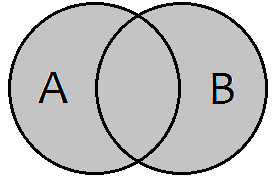

In [83]:
Image(filename="resources/outer-join.png")

In [90]:
atletas_outer = pd.merge(left = atletas_info, right = atletas_pais,
                       how = "outer", left_on = "Athlete", right_on = "Athlete")

In [91]:
atletas_outer.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Aleksey Nemov,24.0,2000.0,10/01/2000,2.0,1.0,3.0,6.0,Russia
1,Alicia Coutts,24.0,2012.0,08/12/2012,1.0,3.0,1.0,5.0,Australia
2,Missy Franklin,17.0,2012.0,08/12/2012,4.0,0.0,1.0,5.0,United States
3,Nastia Liukin,18.0,2008.0,08/24/2008,1.0,3.0,1.0,5.0,United States
4,Sun Yang,20.0,2012.0,08/12/2012,2.0,1.0,1.0,4.0,China


In [92]:
atletas_outer.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
6939,Im Dong-Hyeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea
6940,Mauro Nespoli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
6941,Ilario Di Buò,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
6942,Viktor Ruban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine
6943,Jang Yong-Ho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea


In [93]:
atletas_outer.shape

(6944, 9)